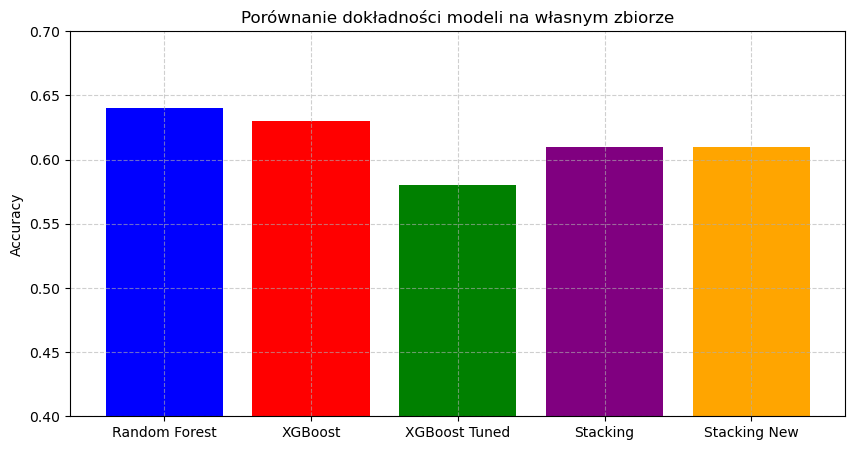

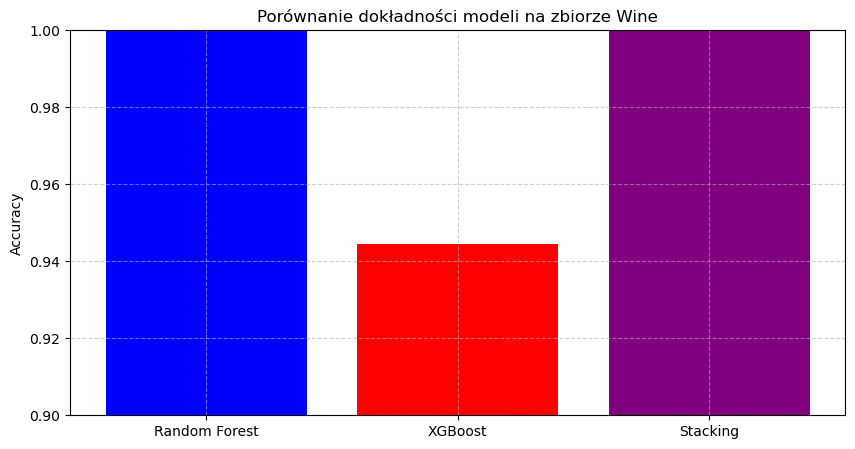

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generowanie własnego zbioru danych
X = np.random.randint(0, 1000, (500, 1))
y = (X % 2 == 0).astype(int).ravel()

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Porównanie dokładności modeli: Random Forest, XGBoost i Stacking
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

estimators = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
              ('svc', SVC(probability=True))]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
stack_acc = accuracy_score(y_test, y_pred_stack)

# 2. Przeprowadzenie tuningu hiperparametrów dla modelu XGBoost
xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, eval_metric='logloss')
xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
xgb_tuned_acc = accuracy_score(y_test, y_pred_xgb_tuned)

# 3. Wprowadzenie nowego modelu do stacking (np. KNN lub DecisionTreeClassifier)
estimators_new = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
                  ('svc', SVC(probability=True)),
                  ('knn', KNeighborsClassifier(n_neighbors=5)),
                  ('dt', DecisionTreeClassifier(random_state=42))]
stack_new = StackingClassifier(estimators=estimators_new, final_estimator=LogisticRegression())
stack_new.fit(X_train, y_train)
y_pred_stack_new = stack_new.predict(X_test)
stack_new_acc = accuracy_score(y_test, y_pred_stack_new)

# 4. Przetestowanie modeli na innym zbiorze danych (Wine)
from sklearn.datasets import load_wine
X_wine, y_wine = load_wine(return_X_y=True)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
rf.fit(X_train_wine, y_train_wine)
y_pred_rf_wine = rf.predict(X_test_wine)
rf_acc_wine = accuracy_score(y_test_wine, y_pred_rf_wine)

xgb.fit(X_train_wine, y_train_wine)
y_pred_xgb_wine = xgb.predict(X_test_wine)
xgb_acc_wine = accuracy_score(y_test_wine, y_pred_xgb_wine)

stack.fit(X_train_wine, y_train_wine)
y_pred_stack_wine = stack.predict(X_test_wine)
stack_acc_wine = accuracy_score(y_test_wine, y_pred_stack_wine)

# 5. Przedstawienie wyników w formie wykresu słupkowego
models = ['Random Forest', 'XGBoost', 'XGBoost Tuned', 'Stacking', 'Stacking New']
accuracies = [rf_acc, xgb_acc, xgb_tuned_acc, stack_acc, stack_new_acc]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'red', 'green', 'purple', 'orange'])
plt.ylabel('Accuracy')
plt.title('Porównanie dokładności modeli na własnym zbiorze')
plt.ylim(0.4, 0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

models_wine = ['Random Forest', 'XGBoost', 'Stacking']
accuracies_wine = [rf_acc_wine, xgb_acc_wine, stack_acc_wine]

plt.figure(figsize=(10, 5))
plt.bar(models_wine, accuracies_wine, color=['blue', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Porównanie dokładności modeli na zbiorze Wine')
plt.ylim(0.9, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
